In [1]:
from deap import base, creator, tools, algorithms
import cma
import numpy as np
import matplotlib.pyplot as plt
import array
import random

In [2]:
def rosen_f(X):
    x, y = X
    return 100 * (y - x ** 2)**2 + (x - 1)**2

def rosen_f_tuple(X):
    return (rosen_f(X),)

def egg_f(X):
    x, y = X
    x = np.clip(x, -512, 512)
    y = np.clip(y, -512, 512)
    return -(y + 47) * np.sin(np.sqrt(np.abs(y + (x/2) + 47))) - x * np.sin(np.sqrt(np.abs(x - (y + 47))))

def egg_f_tuple(X):
    return (egg_f(X),)

In [3]:
def plot_rosen():
    x = np.linspace(-10, 10, 1000)
    y = np.linspace(-5, 5, 1000)

    X, Y = np.meshgrid(x, y)
    Z = rosen_f((X, Y,))

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z)

    plt.show()


def plot_egg():
    x = np.linspace(-600, 600, 1000)
    y = np.linspace(-600, 600, 1000)

    X, Y = np.meshgrid(x, y)
    Z = egg_f((X, Y,))

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z)

    plt.show()

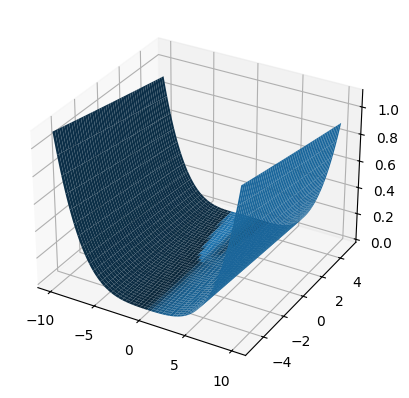

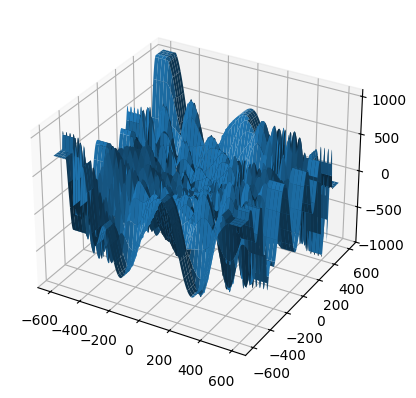

In [4]:
plot_rosen()
plot_egg()

In [5]:
IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY = 2, -10, 10, 0.05, 1.2

def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

def generateES(icls, scls, size, imin, imax, smin, smax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind

toolbox = base.Toolbox()

toolbox.register("individual", generateES, creator.Individual, creator.Strategy,
    IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", rosen_f_tuple)

toolbox.register("mate", tools.cxESBlend, alpha=0.1)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.decorate("mate", checkStrategy(MIN_STRATEGY))
toolbox.decorate("mutate", checkStrategy(MIN_STRATEGY))

def main():
    MU, LAMBDA = 20, 200
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    # stats.register("avg", np.mean)
    # stats.register("std", np.std)
    # stats.register("min", np.min)
    # stats.register("max", np.max)

    pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
        cxpb=0.6, mutpb=0.3, ngen=800, stats=stats, halloffame=hof, verbose=False)

    # return pop, logbook, hof
    print('El mejor individuo es', hof[0], rosen_f(hof[0]))

main()

El mejor individuo es Individual('d', [1.1094547317463312, 1.2307201422026084]) 0.011983216739367435


In [6]:
# Punto inicial y sigma inicial
x0 = np.array([-10.0, 5.0])  # centroid inicial
sigma0 = 5.0               # desviación inicial

# Ejecutar CMA-ES
res = cma.fmin(rosen_f, x0, sigma0, options={'popsize':20, 'maxiter':100})

# Mejor solución encontrada
print("Mejor individuo:", res[0])
print("Valor de la función:", res[1])

(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 2 (seed=985092, Thu Jan  8 00:42:08 2026)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     20 1.240086919508024e+04 1.0e+00 6.08e+00  6e+00  6e+00 0:00.0
    2     40 1.075080410910646e+03 1.5e+00 8.93e+00  9e+00  1e+01 0:00.0
    3     60 1.465484167220852e+02 1.5e+00 8.31e+00  5e+00  7e+00 0:00.0
   66   1320 1.102429159225111e-16 5.1e+01 4.00e-02  1e-07  2e-07 0:00.1
termination on {'tolfun': 1e-11} (Thu Jan  8 00:42:08 2026)
final/bestever f-value = 9.585786e-16 1.102429e-16 after 1321/1308 evaluations
incumbent solution: [0.99999997, 0.99999994]
std deviations: [1.13265507e-07, 2.25285577e-07]
Mejor individuo: [1. 1.]
Valor de la función: 1.1024291592251107e-16


In [31]:
IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY = 2, -512, 512, 0, 150

def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

def generateES(icls, scls, size, imin, imax, smin, smax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind

toolbox = base.Toolbox()

toolbox.register("individual", generateES, creator.Individual, creator.Strategy,
    IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", egg_f_tuple)

toolbox.register("mate", tools.cxESBlend, alpha=0.1)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.decorate("mate", checkStrategy(MIN_STRATEGY))
toolbox.decorate("mutate", checkStrategy(MIN_STRATEGY))

def main():
    MU, LAMBDA = 50, 500
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    # stats.register("avg", np.mean)
    # stats.register("std", np.std)
    # stats.register("min", np.min)
    stats.register("max", np.max)

    pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
        cxpb=0.6, mutpb=0.3, ngen=500, stats=stats, halloffame=hof, verbose=True)

    # return pop, logbook, hof
    print('El mejor individuo es', hof[0], egg_f(hof[0]))

main()

gen	nevals	max    
0  	50    	735.382
1  	446   	184.105
2  	445   	172.137
3  	453   	13.6239
4  	458   	190.216
5  	435   	111.856
6  	454   	-44.5944
7  	452   	-78.952 
8  	431   	-603.73 
9  	457   	-604.309
10 	454   	-607.43 
11 	447   	-615.446
12 	444   	-618.413
13 	451   	-619.995
14 	451   	-621.638
15 	445   	-622.445
16 	442   	-622.671
17 	441   	-622.947
18 	444   	-623.271
19 	450   	-623.419
20 	448   	-623.461
21 	445   	-623.498
22 	452   	-623.545
23 	451   	-623.563
24 	456   	-623.574
25 	441   	-623.58 
26 	445   	-623.587
27 	450   	-623.593
28 	457   	-623.601
29 	441   	-623.608
30 	466   	-623.612
31 	451   	-623.614
32 	440   	-623.616
33 	447   	-623.617
34 	448   	-623.617
35 	449   	-623.617
36 	451   	-623.617
37 	451   	-623.617
38 	444   	-623.617
39 	450   	-623.617
40 	453   	-623.617
41 	444   	-623.617
42 	461   	-623.617
43 	443   	-623.617
44 	450   	-623.617
45 	451   	-623.617
46 	450   	-623.617
47 	452   	-623.617
48 	453   	-623.617
49 	452

In [35]:
# Punto inicial y sigma inicial
x0 = np.array([0,0])  # centroid inicial
sigma0 = 200               # desviación inicial

# Ejecutar CMA-ES
res = cma.fmin(egg_f, x0, sigma0, options={'popsize':500, 'maxiter':500})

# Mejor solución encontrada
print("Mejor individuo:", res[0])
print("Valor de la función:", res[1])

(250_w,500)-aCMA-ES (mu_w=128.6,w_1=2%) in dimension 2 (seed=935767, Thu Jan  8 00:47:02 2026)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    500 -5.681965046804606e+02 1.0e+00 2.14e+02  3e+02  3e+02 0:00.0
    2   1000 -8.873696364753298e+02 1.1e+00 2.12e+02  3e+02  3e+02 0:00.0
    3   1500 -8.825636073412852e+02 1.0e+00 2.51e+02  4e+02  4e+02 0:00.0
NOTE (module=cma, iteration=47):  
condition in coordinate system exceeded 4.3e+08, rescaled to 1.0e+00, 
condition changed from 9.4e+07 to 1.5e+00
   60  30000 -8.586012151485547e+02 4.8e+03 3.35e+02  8e-07  1e+02 0:00.7
termination on {'tolfun': 1e-11} (Thu Jan  8 00:47:03 2026)
final/bestever f-value = -8.586012e+02 -9.596260e+02 after 30001/11283 evaluations
incumbent solution: [ 356.34418682, 1421.14615403]
std deviations: [8.49447574e-07, 1.40278524e+02]
Mejor individuo: [639.52797118 404.34523857]
Valor de la función: -959.6260239600733
